<a href="https://colab.research.google.com/github/ketphan02/visualize-npm-packages/blob/main/Visualize_npm_packages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

express
47


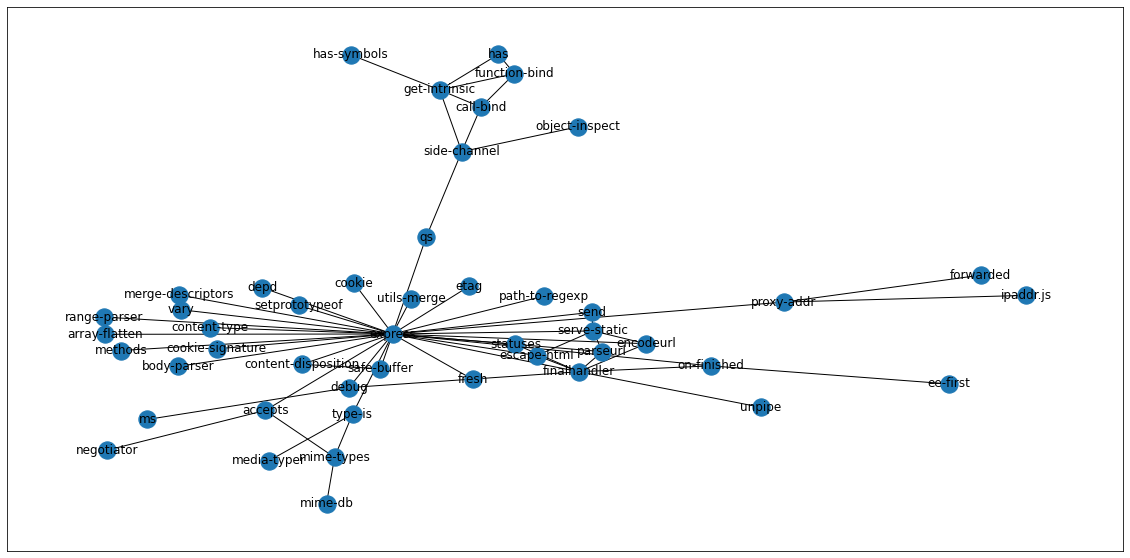

In [34]:
import requests
import time
from bs4 import BeautifulSoup
from urllib.parse import unquote
import networkx as nx
import matplotlib.pyplot as plt
# %matplotlib inline
  
# Defining a Class
class GraphVisualization:
   
    def __init__(self):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
        self.visual = []
          
    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
          
    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        fig = plt.figure(figsize=(20, 10))
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()

package_name = input().strip()
package_href = 'package/' + package_name
base_url = 'https://www.npmjs.com/'
dependencies = set()
checked_dependencies = []
G = GraphVisualization()
cnt = 1

def append_packages(package_href, flag = False):
  package_url = base_url + package_href + '?activeTab=dependencies'
  package_contents = requests.get(package_url).text
  try:
    soup = BeautifulSoup(package_contents, 'html.parser')
    dependencies = soup.find(id='tabpanel-dependencies').find('ul').find_all('a', href=True)
    dependencies = [dependency['href'] for dependency in dependencies]

    pacakge_name = package_href.split('/')[-1]
    for dependency in dependencies:
      G.addEdge(pacakge_name, unquote(dependency.split('/')[-1]))
  except Exception as e:
    if not flag:
      print('                                            ', end='\r')
      print('Waiting for the API to recover', end='')
      for i in range(10):
          print('.', end='')
          time.sleep(1)
      return append_packages(package_href, True)
    else:
        dependencies = []
  return dependencies

while True:
  if (package_href not in checked_dependencies):
    dependencies_arr = append_packages(package_href)
    checked_dependencies.append(package_href)
    dependencies.update(dependencies_arr)
  
  if (len(dependencies) == 0):
    break

  package_href = dependencies.pop()
  print('                                            ', end='\r')
  print(cnt, unquote(package_href.split('/')[-1]), end='', sep='. ')
  cnt += 1

print('                                            ', end='\r')
print(len(checked_dependencies))
G.visualize()